### Cite 5 diferenças entre o Random Forest e o AdaBoost

1. Estrutura dos Modelos:

Random Forest: Constrói múltiplas árvores de decisão independentes em paralelo. Cada árvore é treinada com um subconjunto aleatório dos dados de treino.

AdaBoost: Constrói modelos sequenciais, geralmente árvores de decisão de profundidade única (stumps), onde cada modelo subsequente é treinado para corrigir os erros dos modelos anteriores.

2. Método de Treinamento:

Random Forest: Utiliza o método de bagging (bootstrap aggregating), onde cada árvore é treinada com uma amostra aleatória com reposição dos dados originais.

AdaBoost: Utiliza o método de boosting, onde o treinamento é adaptativo e cada novo modelo é ajustado para corrigir os erros dos modelos anteriores, dando mais peso aos exemplos mal classificados.

3. Combinação dos Modelos:

Random Forest: Combina os resultados das árvores através de votação majoritária (para classificação) ou média (para regressão).

AdaBoost: Combina os resultados dos modelos ponderando cada modelo de acordo com sua precisão. Modelos com melhor desempenho têm mais influência na predição final.

4. Robustez a Overfitting:

Random Forest: É geralmente mais robusto ao overfitting devido à sua natureza de ensemble de árvores independentes e uso de amostragem aleatória.

AdaBoost: Pode ser mais suscetível ao overfitting, especialmente com dados ruidosos, pois concentra mais esforço em corrigir erros dos exemplos mal classificados.

5. Importância das Características:

Random Forest: Calcula a importância das características como parte do treinamento, analisando a redução de impureza (Gini ou entropia) em cada divisão de árvore.

AdaBoost: Não fornece diretamente uma medida de importância das características, mas a importância pode ser inferida indiretamente pelos pesos atribuídos às instâncias e os erros corrigidos.

### Acesse o link Scikit-learn– adaboost , leia a explicação (traduza se for preciso) e crie um jupyter notebook contendo o exemplo do AdaBoost.

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [4]:
# Criação do modelo
base_estimator = DecisionTreeClassifier(max_depth=1)
ada = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

In [5]:
# Treinamento do modelo
ada.fit(X_train, y_train)

c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [6]:
# Previsões
y_pred = ada.predict(X_test)

Acurácia: 0.93

Matriz de Confusão:


0.9333333333333333

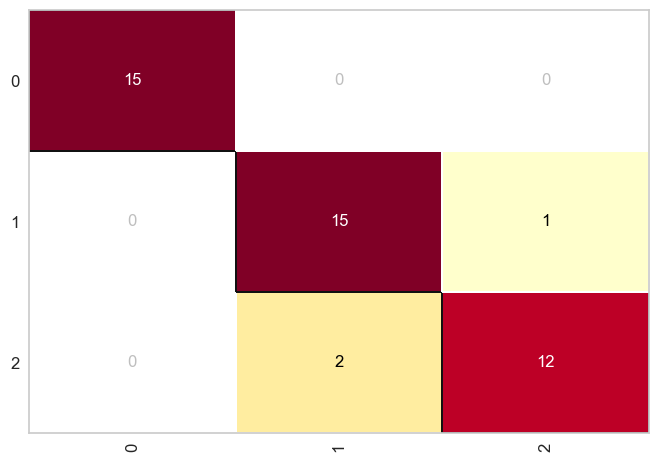

In [11]:
# Avaliação de desempenho
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix

print(f'Acurácia: {round(accuracy_score(y_test, y_pred), 2)}\n')
print('Matriz de Confusão:')
cm = ConfusionMatrix(ada)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

### Cite 5 Hyperparametros importantes no AdaBoost.

1. estimator: estimador base a partir do qual o ensemble é construído.
2. n_estimator: o número máximo de estimadores a serem adicionados ao ensemble.
3. learning_rate: constante multiplicadora para as taxas de aprendizado dos estimadores
4. algorithm: o algoritmo de boosting a ser udado
5. random_state: valor de semente para o gerador de números aleatórios.

### Utilize o GridSearch para encontrar os melhores hyperparametros para o conjunto de dados do exemplo (load_iris)

In [17]:
# Importando as bibliotecas necessárias
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Carregando o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definindo a grade de hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'estimator__max_depth': [1, 2, 3, 4]
}

# Criando o modelo AdaBoost com uma árvore de decisão como estimador base
base_estimator = DecisionTreeClassifier()
ada = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Configurando o GridSearchCV
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Executando o GridSearchCV
grid_search.fit(X_train, y_train)

# Obtendo os melhores hiperparâmetros
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

# Treinando o modelo com os melhores hiperparâmetros
best_ada = grid_search.best_estimator_
best_ada.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = best_ada.predict(X_test)

# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f'Acurácia: {accuracy:.2f}')
print('Relatório de Classificação:')
print(report)

Melhores hiperparâmetros: {'estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 50}
Acurácia: 1.00
Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
